In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('EarthQuake_data_with_prep.csv')
df

,time,latitude,longitude,depth,mag,nst,gap,dmin
0,2023-10-20T23:00:21.109Z,14.3667,-93.4221,10.000,4.9,100.000000,91.0,2.272
1,2023-10-20T21:21:24.042Z,-19.1188,-173.3136,10.000,4.5,19.000000,173.0,2.705
2,2023-10-20T19:51:55.439Z,0.7788,125.2063,51.393,5.2,194.000000,44.0,2.160
3,2023-10-20T19:34:02.111Z,-5.4912,150.2567,124.504,4.9,42.000000,82.0,2.298
4,2023-10-20T19:16:09.952Z,30.9618,141.4852,35.000,4.5,33.000000,128.0,2.574
...,...,...,...,...,...,...,...,...
1449,2016-10-15T00:50:02.980Z,-17.6334,-178.6128,547.860,4.5,72.952641,79.0,3.180
1450,2016-10-15T00:46:53.850Z,-1.0721,-24.7087,10.000,4.5,72.952641,114.0,12.128
1451,2016-10-14T22:36:20.310Z,16.5779,148.1442,10.000,4.5,72.952641,167.0,2.624
1452,2016-10-14T22:02:34.010Z,16.4765,148.4049,10.000,4.6,72.952641,88.0,2.797


In [126]:
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df

,time,latitude,longitude,depth,mag,nst,gap,dmin,timestamp
0,2023-10-20T23:00:21.109Z,14.3667,-93.4221,10.000,4.9,100.000000,91.0,2.272,2023-10-20 23:00:21.109
1,2023-10-20T21:21:24.042Z,-19.1188,-173.3136,10.000,4.5,19.000000,173.0,2.705,2023-10-20 21:21:24.042
2,2023-10-20T19:51:55.439Z,0.7788,125.2063,51.393,5.2,194.000000,44.0,2.160,2023-10-20 19:51:55.439
3,2023-10-20T19:34:02.111Z,-5.4912,150.2567,124.504,4.9,42.000000,82.0,2.298,2023-10-20 19:34:02.111
4,2023-10-20T19:16:09.952Z,30.9618,141.4852,35.000,4.5,33.000000,128.0,2.574,2023-10-20 19:16:09.952
...,...,...,...,...,...,...,...,...,...
1449,2016-10-15T00:50:02.980Z,-17.6334,-178.6128,547.860,4.5,72.952641,79.0,3.180,2016-10-15 00:50:02.980
1450,2016-10-15T00:46:53.850Z,-1.0721,-24.7087,10.000,4.5,72.952641,114.0,12.128,2016-10-15 00:46:53.850
1451,2016-10-14T22:36:20.310Z,16.5779,148.1442,10.000,4.5,72.952641,167.0,2.624,2016-10-14 22:36:20.310
1452,2016-10-14T22:02:34.010Z,16.4765,148.4049,10.000,4.6,72.952641,88.0,2.797,2016-10-14 22:02:34.010


In [127]:
X = df[['latitude', 'longitude','depth','nst','gap','dmin']]
y = df[['mag']]

In [128]:
X

,latitude,longitude,depth,nst,gap,dmin
0,14.3667,-93.4221,10.000,100.000000,91.0,2.272
1,-19.1188,-173.3136,10.000,19.000000,173.0,2.705
2,0.7788,125.2063,51.393,194.000000,44.0,2.160
3,-5.4912,150.2567,124.504,42.000000,82.0,2.298
4,30.9618,141.4852,35.000,33.000000,128.0,2.574
...,...,...,...,...,...,...
1449,-17.6334,-178.6128,547.860,72.952641,79.0,3.180
1450,-1.0721,-24.7087,10.000,72.952641,114.0,12.128
1451,16.5779,148.1442,10.000,72.952641,167.0,2.624
1452,16.4765,148.4049,10.000,72.952641,88.0,2.797


In [129]:
y

,mag
0,4.9
1,4.5
2,5.2
3,4.9
4,4.5
...,...
1449,4.5
1450,4.5
1451,4.5
1452,4.6


In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [131]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.52966718, 0.24053951, 0.01252264, 0.2238806 , 0.30152672,
        0.05567742],
       [0.30856314, 0.01855017, 0.01252264, 0.02238806, 0.61450382,
        0.06634954],
       [0.43994657, 0.8480281 , 0.07604585, 0.45771144, 0.1221374 ,
        0.05291696],
       ...,
       [0.54426769, 0.91176416, 0.01252264, 0.15659861, 0.59160305,
        0.06435314],
       [0.54359815, 0.91248855, 0.01252264, 0.15659861, 0.29007634,
        0.06861706],
       [0.35289092, 0.9640025 , 0.28300236, 0.15659861, 0.1259542 ,
        0.18394006]])

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(1163, 6) (291, 6) (1163, 1) (291, 6)


### Use RandomForestRegression to Prediction

In [133]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_R = model.predict(X_test)

<ipython-input-133-c9064e721a61>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [134]:
y_pred_R

array([4.758 , 4.873 , 4.543 , 5.121 , 5.756 , 4.908 , 5.634 , 4.837 ,
       4.585 , 5.04  , 4.592 , 4.574 , 4.842 , 4.541 , 4.553 , 5.2143,
       4.648 , 4.812 , 5.006 , 4.7214, 4.615 , 5.024 , 4.786 , 5.165 ,
       4.863 , 4.547 , 4.926 , 4.542 , 4.945 , 4.662 , 4.555 , 5.1646,
       5.364 , 4.811 , 4.788 , 4.888 , 4.672 , 4.566 , 4.908 , 4.695 ,
       5.215 , 4.596 , 4.925 , 4.916 , 5.121 , 4.532 , 4.706 , 4.7715,
       4.534 , 4.719 , 4.891 , 4.706 , 6.122 , 4.629 , 4.821 , 4.548 ,
       4.549 , 4.622 , 4.9613, 4.652 , 4.823 , 5.821 , 4.64  , 5.466 ,
       4.749 , 4.856 , 4.602 , 4.718 , 4.863 , 4.628 , 5.19  , 4.691 ,
       4.682 , 4.624 , 4.611 , 5.023 , 4.769 , 4.876 , 4.669 , 4.675 ,
       5.037 , 4.671 , 4.599 , 4.717 , 4.64  , 4.612 , 4.803 , 4.519 ,
       5.136 , 4.57  , 4.797 , 4.61  , 4.61  , 4.673 , 4.809 , 4.595 ,
       4.733 , 4.558 , 5.359 , 4.589 , 4.663 , 5.191 , 4.828 , 4.714 ,
       4.704 , 4.891 , 4.619 , 4.932 , 4.701 , 4.7998, 4.575 , 4.898 ,
      

In [135]:
y_test

,mag
497,4.7
1260,4.5
411,4.5
1179,4.8
1033,5.2
...,...
626,4.5
477,4.5
674,4.9
1296,4.6


In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_R)
mse = mean_squared_error(y_test, y_pred_R)
r2 = r2_score(y_test, y_pred_R)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.20061305841924412
Mean Squared Error: 0.08879000061855674
R-squared: 0.4684679056564197


### Use KNeighborsRegression to Prediction

In [137]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=25)
model.fit(X_train, y_train)
y_pred_K = model.predict(X_test)

In [138]:
y_pred_K

array([[4.936 ],
       [4.764 ],
       [4.672 ],
       [5.04  ],
       [5.104 ],
       [4.848 ],
       [5.352 ],
       [4.716 ],
       [4.6   ],
       [5.008 ],
       [4.948 ],
       [4.804 ],
       [5.    ],
       [4.68  ],
       [4.588 ],
       [5.324 ],
       [4.664 ],
       [4.76  ],
       [4.856 ],
       [4.8788],
       [4.652 ],
       [4.764 ],
       [4.648 ],
       [4.988 ],
       [4.776 ],
       [4.584 ],
       [4.848 ],
       [4.684 ],
       [4.864 ],
       [4.652 ],
       [4.66  ],
       [5.2924],
       [5.42  ],
       [4.792 ],
       [4.864 ],
       [4.824 ],
       [4.78  ],
       [4.736 ],
       [4.904 ],
       [4.748 ],
       [5.088 ],
       [4.596 ],
       [4.952 ],
       [4.936 ],
       [5.    ],
       [4.672 ],
       [4.72  ],
       [4.768 ],
       [4.624 ],
       [4.656 ],
       [4.88  ],
       [4.732 ],
       [5.26  ],
       [4.636 ],
       [4.94  ],
       [4.592 ],
       [4.704 ],
       [4.668 ],
       [5.024 

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_K)
mse = mean_squared_error(y_test, y_pred_K)
r2 = r2_score(y_test, y_pred_K)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.22915738831615123
Mean Squared Error: 0.10156851024054984
R-squared: 0.3919706882372316


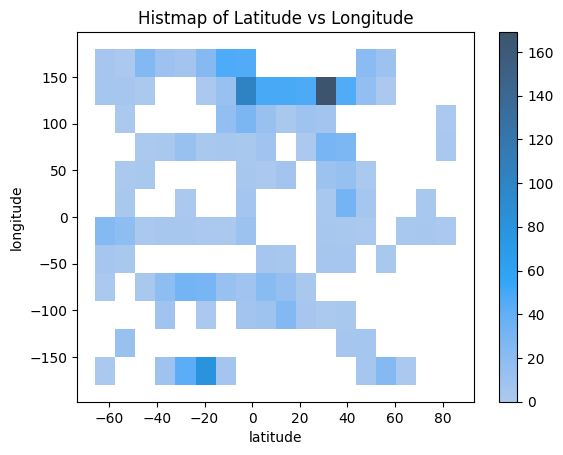

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างกราฟ histmap
sns.histplot(data=df, x='latitude', y='longitude', cbar=True)
plt.title('Histmap of Latitude vs Longitude')
plt.show()
